# 2. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pyproj
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Temporal EDA

In [2]:
# Load the data
data = pd.read_csv("../dataset/weather_data_formatted_weekly_rename_station_column_with_trend_words.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.head()

,Year,Week,cases,Ang Mo Kio_Weekly Rainfall (mm),Ang Mo Kio_Weekly Mean Temperature (°C),Ang Mo Kio_Weekly Maximum Temperature (°C),Ang Mo Kio_Weekly Minimum Temperature (°C),Ang Mo Kio_Weekly Mean Wind Speed (km/h),Ang Mo Kio_Weekly Maximum Wind Speed (km/h),Changi_Weekly Rainfall (mm),Changi_Weekly Mean Temperature (°C),Changi_Weekly Maximum Temperature (°C),Changi_Weekly Minimum Temperature (°C),Changi_Weekly Mean Wind Speed (km/h),Changi_Weekly Maximum Wind Speed (km/h),Clementi_Weekly Rainfall (mm),Clementi_Weekly Mean Wind Speed (km/h),Clementi_Weekly Maximum Wind Speed (km/h),East Coast Parkway_Weekly Rainfall (mm),Jurong Island_Weekly Rainfall (mm),Khatib_Weekly Rainfall (mm),Marina Barrage_Weekly Rainfall (mm),Pasir Panjang_Weekly Rainfall (mm),Pasir Panjang_Weekly Mean Temperature (°C),Pasir Panjang_Weekly Maximum Temperature (°C),Pasir Panjang_Weekly Minimum Temperature (°C),Pasir Panjang_Weekly Mean Wind Speed (km/h),Pasir Panjang_Weekly Maximum Wind Speed (km/h),Tai Seng_Weekly Rainfall (mm),Tai Seng_Weekly Mean Temperature (°C),Tai Seng_Weekly Maximum Temperature (°C),Tai Seng_Weekly Minimum Temperature (°C),Tai Seng_Weekly Mean Wind Speed (km/h),Tai Seng_Weekly Maximum Wind Speed (km/h),Tuas South_Weekly Rainfall (mm),Tuas South_Weekly Maximum Temperature (°C),Tuas South_Weekly Minimum Temperature (°C),Tuas South_Weekly Mean Wind Speed (km/h),Tuas South_Weekly Maximum Wind Speed (km/h),Botanic Garden_Weekly Rainfall (mm),Buangkok_Weekly Rainfall (mm),Bukit Panjang_Weekly Rainfall (mm),Buona Vista_Weekly Rainfall (mm),Choa Chu Kang (Central)_Weekly Rainfall (mm),Choa Chu Kang (West)_Weekly Rainfall (mm),Jurong Pier_Weekly Rainfall (mm),Kent Ridge_Weekly Rainfall (mm),Macritchie Reservoir_Weekly Rainfall (mm),Mandai_Weekly Rainfall (mm),Nicoll Highway_Weekly Rainfall (mm),Paya Lebar_Weekly Rainfall (mm),Paya Lebar_Weekly Maximum Temperature (°C),Paya Lebar_Weekly Minimum Temperature (°C),Paya Lebar_Weekly Mean Wind Speed (km/h),Paya Lebar_Weekly Maximum Wind Speed (km/h),Punggol_Weekly Rainfall (mm),Queenstown_Weekly Rainfall (mm),Seletar_Weekly Rainfall (mm),Seletar_Weekly Mean Wind Speed (km/h),Seletar_Weekly Maximum Wind Speed (km/h),Sembawang_Weekly Rainfall (mm),Sembawang_Weekly Maximum Temperature (°C),Sembawang_Weekly Minimum Temperature (°C),Sembawang_Weekly Mean Wind Speed (km/h),Serangoon_Weekly Rainfall (mm),Somerset (Road)_Weekly Rainfall (mm),Tanjong Katong_Weekly Rainfall (mm),Tengah_Weekly Rainfall (mm),Tengah_Weekly Maximum Temperature (°C),Tengah_Weekly Minimum Temperature (°C),Tengah_Weekly Mean Wind Speed (km/h),Tengah_Weekly Maximum Wind Speed (km/h),Toa Payoh_Weekly Rainfall (mm),Ulu Pandan_Weekly Rainfall (mm),Upper Peirce Reservoir_Weekly Rainfall (mm),Upper Thomson_Weekly Rainfall (mm),Whampoa_Weekly Rainfall (mm),Dengue fever: (Singapore),Headache: (Singapore),Nausea: (Singapore),vomitting: (Singapore),muscle ache: (Singapore),rashes: (Singapore),Mosquito bite: (Singapore)
0,2014,1,437,55.6,25.971429,31.8,23.3,5.257143,31.0,57.2,26.171429,31.8,23.3,7.142857,34.9,44.8,4.300000,35.3,44.6,50.8,93.4,60.2,40.2,26.700000,31.7,23.8,10.585714,45.0,36.0,26.714286,31.6,24.1,8.071429,40.0,34.6,31.7,23.2,6.614286,66.2,43.6,46.0,63.8,39.0,65.4,56.4,60.0,39.4,48.0,81.2,56.0,47.7,33.0,23.8,10.642857,50.0,59.2,37.2,54.2,9.271429,44.3,104.2,31.9,22.5,8.214286,58.3,43.8,88.0,88.4,32.4,22.6,10.300000,42.5,47.4,13.2,62.6,49.4,52.6,53,69,43,0,29,87,0
1,2014,2,479,0.8,25.785714,29.4,23.5,9.185714,41.4,18.2,26.271429,30.3,23.7,12.914286,40.0,0.2,7.400000,43.2,6.2,2.0,0.6,2.4,1.0,26.642857,30.4,24.4,15.700000,50.4,6.6,26.528571,29.7,24.5,15.885714,46.4,0.0,30.9,24.0,8.014286,28.1,0.0,3.0,0.6,0.0,1.4,3.8,6.4,0.0,0.6,0.2,1.8,5.4,30.6,23.8,18.957143,48.2,6.8,0.0,6.0,19.742857,50.0,0.6,30.3,21.1,14.314286,2.0,1.0,7.2,2.7,30.6,22.0,16.814286,46.4,1.6,0.0,0.4,0.2,1.4,55,70,79,30,34,39,0
2,2014,3,401,0.0,25.385714,29.3,22.9,9.300000,38.9,0.0,25.757143,29.4,23.2,12.157143,41.4,0.0,6.871429,38.2,0.0,0.0,0.0,0.0,0.0,26.200

In [3]:
# Clean feature names to replace special characters with underscore
clean = lambda x: x.lower().replace(' ', '_').replace('.', '_').replace('(', '_').replace(')', '_').replace(':', '_')
data = data.rename(columns=clean)
data.head()

,year,week,cases,ang_mo_kio_weekly_rainfall__mm_,ang_mo_kio_weekly_mean_temperature__°c_,ang_mo_kio_weekly_maximum_temperature__°c_,ang_mo_kio_weekly_minimum_temperature__°c_,ang_mo_kio_weekly_mean_wind_speed__km/h_,ang_mo_kio_weekly_maximum_wind_speed__km/h_,changi_weekly_rainfall__mm_,changi_weekly_mean_temperature__°c_,changi_weekly_maximum_temperature__°c_,changi_weekly_minimum_temperature__°c_,changi_weekly_mean_wind_speed__km/h_,changi_weekly_maximum_wind_speed__km/h_,clementi_weekly_rainfall__mm_,clementi_weekly_mean_wind_speed__km/h_,clementi_weekly_maximum_wind_speed__km/h_,east_coast_parkway_weekly_rainfall__mm_,jurong_island_weekly_rainfall__mm_,khatib_weekly_rainfall__mm_,marina_barrage_weekly_rainfall__mm_,pasir_panjang_weekly_rainfall__mm_,pasir_panjang_weekly_mean_temperature__°c_,pasir_panjang_weekly_maximum_temperature__°c_,pasir_panjang_weekly_minimum_temperature__°c_,pasir_panjang_weekly_mean_wind_speed__km/h_,pasir_panjang_weekly_maximum_wind_speed__km/h_,tai_seng_weekly_rainfall__mm_,tai_seng_weekly_mean_temperature__°c_,tai_seng_weekly_maximum_temperature__°c_,tai_seng_weekly_minimum_temperature__°c_,tai_seng_weekly_mean_wind_speed__km/h_,tai_seng_weekly_maximum_wind_speed__km/h_,tuas_south_weekly_rainfall__mm_,tuas_south_weekly_maximum_temperature__°c_,tuas_south_weekly_minimum_temperature__°c_,tuas_south_weekly_mean_wind_speed__km/h_,tuas_south_weekly_maximum_wind_speed__km/h_,botanic_garden_weekly_rainfall__mm_,buangkok_weekly_rainfall__mm_,bukit_panjang_weekly_rainfall__mm_,buona_vista_weekly_rainfall__mm_,choa_chu_kang__central__weekly_rainfall__mm_,choa_chu_kang__west__weekly_rainfall__mm_,jurong_pier_weekly_rainfall__mm_,kent_ridge_weekly_rainfall__mm_,macritchie_reservoir_weekly_rainfall__mm_,mandai_weekly_rainfall__mm_,nicoll_highway_weekly_rainfall__mm_,paya_lebar_weekly_rainfall__mm_,paya_lebar_weekly_maximum_temperature__°c_,paya_lebar_weekly_minimum_temperature__°c_,paya_lebar_weekly_mean_wind_speed__km/h_,paya_lebar_weekly_maximum_wind_speed__km/h_,punggol_weekly_rainfall__mm_,queenstown_weekly_rainfall__mm_,seletar_weekly_rainfall__mm_,seletar_weekly_mean_wind_speed__km/h_,seletar_weekly_maximum_wind_speed__km/h_,sembawang_weekly_rainfall__mm_,sembawang_weekly_maximum_temperature__°c_,sembawang_weekly_minimum_temperature__°c_,sembawang_weekly_mean_wind_speed__km/h_,serangoon_weekly_rainfall__mm_,somerset__road__weekly_rainfall__mm_,tanjong_katong_weekly_rainfall__mm_,tengah_weekly_rainfall__mm_,tengah_weekly_maximum_temperature__°c_,tengah_weekly_minimum_temperature__°c_,tengah_weekly_mean_wind_speed__km/h_,tengah_weekly_maximum_wind_speed__km/h_,toa_payoh_weekly_rainfall__mm_,ulu_pandan_weekly_rainfall__mm_,upper_peirce_reservoir_weekly_rainfall__mm_,upper_thomson_weekly_rainfall__mm_,whampoa_weekly_rainfall__mm_,dengue_fever___singapore_,headache___singapore_,nausea___singapore_,vomitting___singapore_,muscle_ache___singapore_,rashes___singapore_,mosquito_bite___singapore_
0,2014,1,437,55.6,25.971429,31.8,23.3,5.257143,31.0,57.2,26.171429,31.8,23.3,7.142857,34.9,44.8,4.300000,35.3,44.6,50.8,93.4,60.2,40.2,26.700000,31.7,23.8,10.585714,45.0,36.0,26.714286,31.6,24.1,8.071429,40.0,34.6,31.7,23.2,6.614286,66.2,43.6,46.0,63.8,39.0,65.4,56.4,60.0,39.4,48.0,81.2,56.0,47.7,33.0,23.8,10.642857,50.0,59.2,37.2,54.2,9.271429,44.3,104.2,31.9,22.5,8.214286,58.3,43.8,88.0,88.4,32.4,22.6,10.300000,42.5,47.4,13.2,62.6,49.4,52.6,53,69,43,0,29,87,0
1,2014,2,479,0.8,25.785714,29.4,23.5,9.185714,41.4,18.2,26.271429,30.3,23.7,12.914286,40.0,0.2,7.400000,43.2,6.2,2.0,0.6,2.4,1.0,26.642857,30.4,24.4,15.700000,50.4,6.6,26.528571,29.7,24.5,15.885714,46.4,0.0,30.9,24.0,8.014286,28.1,0.0,3.0,0.6,0.0,1.4,3.8,6.4,0.0,0.6,0.2,1.8,5.4,30.6,23.8,18.957143,48.2,6.8,0.0,6.0,19.742857,50.0,0.6,30.3,21.1,14.314286,2.0,1.0,7.2,2.7,30.6,22.0,16.814286,46.4,1.6,0.0,0.4,0.2,1.4,55,70,79,30,34,39,0
2,2014,3,401,0.0,25.385714,29.3,22.9,9.300000,38.9,0.0,25.757143,29.4,23.2,12.157143,41.4,0.0,6.871429,38.2,0.0,0.0,0.0,0.0,0.0,26.200

In [4]:
data = data[['year','week','cases','dengue_fever___singapore_','headache___singapore_','nausea___singapore_',
                 'vomitting___singapore_','muscle_ache___singapore_','rashes___singapore_','mosquito_bite___singapore_',
                 'changi_weekly_rainfall__mm_','changi_weekly_mean_temperature__°c_','changi_weekly_maximum_temperature__°c_',
                 'changi_weekly_minimum_temperature__°c_','changi_weekly_mean_wind_speed__km/h_','changi_weekly_maximum_wind_speed__km/h_']]

In [5]:
data = data.rename(columns={'dengue_fever___singapore_':'dengue fever (google)',
                            'headache___singapore_':'headache (google)',
                            'nausea___singapore_':'nausea (google)', 
                            'vomitting___singapore_':'vomitting (google)',
                            'muscle_ache___singapore_':'muscle ache (google)',
                            'rashes___singapore_':'rashes (google)',
                            'mosquito_bite___singapore_':'mosquito bite (google)',
                            'changi_weekly_rainfall__mm_':'weekly total rainfall (mm)',
                            'changi_weekly_mean_temperature__°c_':'average temperature (°c)',
                            'changi_weekly_maximum_temperature__°c_':'maximum temperature (°c)',
                            'changi_weekly_minimum_temperature__°c_':'minimum temperature (°c)',
                            'changi_weekly_mean_wind_speed__km/h_':'average wind speed (km/h)',
                            'changi_weekly_maximum_wind_speed__km/h_':'maximum wind speed (km/h)'
                           })
data.head()

,year,week,cases,dengue fever (google),headache (google),nausea (google),vomitting (google),muscle ache (google),rashes (google),mosquito bite (google),weekly total rainfall (mm),average temperature (°c),maximum temperature (°c),minimum temperature (°c),average wind speed (km/h),maximum wind speed (km/h)
0,2014,1,437,53,69,43,0,29,87,0,57.2,26.171429,31.8,23.3,7.142857,34.9
1,2014,2,479,55,70,79,30,34,39,0,18.2,26.271429,30.3,23.7,12.914286,40.0
2,2014,3,401,42,73,35,0,0,72,17,0.0,25.757143,29.4,23.2,12.157143,41.4
3,2014,4,336,32,80,63,0,0,57,15,0.0,26.071429,31.6,22.4,13.814286,42.8
4,2014,5,234,37,52,44,0,0,52,37,0.2,26.300000,31.6,22.7,11.842857,35.6


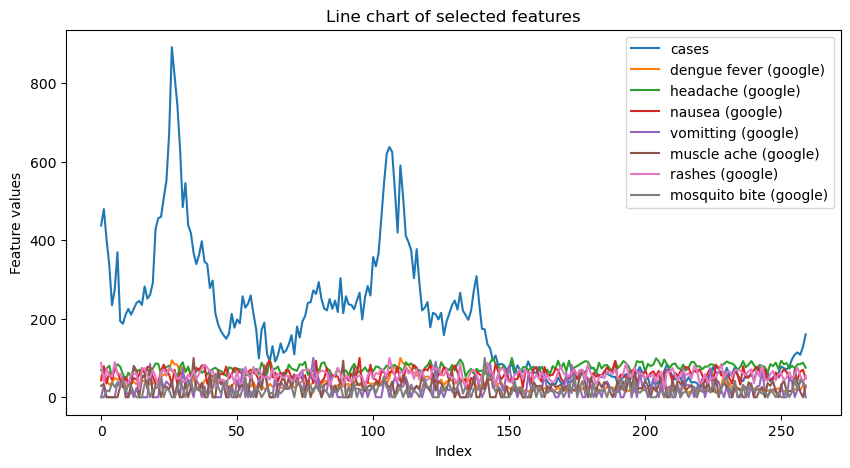

In [6]:
google_trend = ['cases', 'dengue fever (google)','headache (google)','nausea (google)', 
                    'vomitting (google)','muscle ache (google)','rashes (google)','mosquito bite (google)',]

data[google_trend].plot(figsize=(10,5)) # plot selected features
plt.xlabel('Index')
plt.ylabel('Feature values')
plt.title('Line chart of selected features')
plt.show()

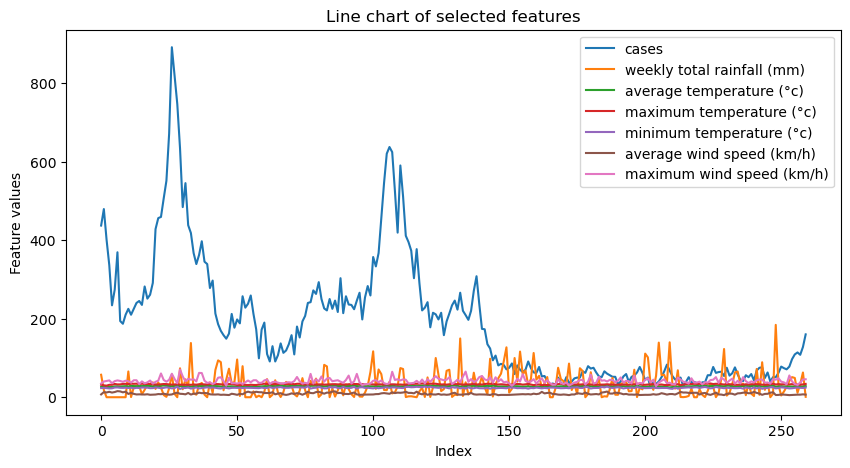

In [7]:
weather = ['cases', 'weekly total rainfall (mm)','average temperature (°c)','maximum temperature (°c)',
           'minimum temperature (°c)','average wind speed (km/h)','maximum wind speed (km/h)']

data[weather].plot(figsize=(10,5)) # plot selected features
plt.xlabel('Index')
plt.ylabel('Feature values')
plt.title('Line chart of selected features')
plt.show()

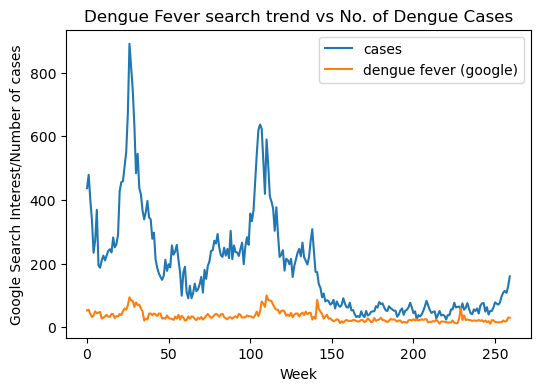

In [8]:
dengue_trend = ['cases', 'dengue fever (google)']

data[dengue_trend].plot(figsize=(6,4)) # plot selected features
plt.xlabel('Week')
plt.ylabel('Google Search Interest/Number of cases')
plt.title('Dengue Fever search trend vs No. of Dengue Cases')
plt.show()

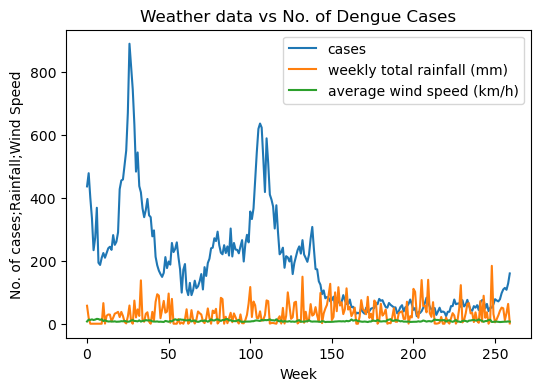

In [9]:
rainfall = ['cases', 'weekly total rainfall (mm)','average wind speed (km/h)']

data[rainfall].plot(figsize=(6,4)) # plot selected features
plt.xlabel('Week')
plt.ylabel('No. of cases;Rainfall;Wind Speed')
plt.title('Weather data vs No. of Dengue Cases')
plt.show()

In [10]:
data['cases_previous_week'] = data['cases'].shift(1)

In [11]:
test_data = data.iloc[207:,]
test_data = test_data[['year','week','cases','cases_previous_week']]

In [12]:
test_data

,year,week,cases,cases_previous_week
207,2017,52,66,51.0
208,2018,1,83,66.0
209,2018,2,68,83.0
210,2018,3,54,68.0
211,2018,4,45,54.0
212,2018,5,48,45.0
213,2018,6,50,48.0
214,2018,7,28,50.0
215,2018,8,39,28.0
216,2018,9,51,39.0


In [13]:
y_test = test_data['cases']
y_pred = test_data['cases_previous_week']
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

RMSE: 13.96
Mean Squared Error: 195.0
Mean Absolute Error: 11.641509433962264


In [14]:
median_by_year = data.groupby('year')['cases'].median()
median_by_year

year
2014    294.0
2015    225.5
2016    217.5
2017     52.0
2018     57.0
Name: cases, dtype: float64

In [15]:
test_data['median_pred'] = 52

In [16]:
y_test = test_data['cases']
y_pred = test_data['median_pred']
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

RMSE: 27.58
Mean Squared Error: 760.811320754717
Mean Absolute Error: 18.62264150943396


In [17]:
mean_by_year = data.groupby('year')['cases'].mean()
mean_by_year

year
2014    349.384615
2015    217.192308
2016    251.634615
2017     53.211538
2018     63.134615
Name: cases, dtype: float64

In [18]:
test_data['mean_pred'] = 53.211538

In [19]:
y_test = test_data['cases']
y_pred = test_data['mean_pred']
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

RMSE: 27.11
Mean Squared Error: 735.1681249292176
Mean Absolute Error: 18.325471811320753


## Geospatial EDA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pyproj

## Mapping dengue cases with subzones

In [21]:
#Read all_clusters.csv file
all_clusters = pd.read_csv("../dataset/all_clusters.csv")
all_clusters.head()

,Number Of Cases,Street Address,Latitude,Longitude,Cluster Number,Recent Cases In Cluster,Total Cases In Cluster,Date,Month Number
0,1,admiralty drive (block 357a),1.450093,103.817001,1,2,42,160704,7
1,1,admiralty drive (block 359),1.449739,103.815939,1,2,42,160704,7
2,1,admiralty drive (block 360c),1.448494,103.814512,1,2,42,160704,7
3,1,admiralty drive (block 467),1.452453,103.814628,1,2,42,160704,7
4,4,admiralty drive (block 467a),1.452823,103.813730,1,2,42,160704,7


In [22]:
all_clusters.isnull().sum()

Number Of Cases            0
Street Address             0
Latitude                   0
Longitude                  0
Cluster Number             0
Recent Cases In Cluster    0
Total Cases In Cluster     0
Date                       0
Month Number               0
dtype: int64

In [23]:
all_clusters.shape

(20258, 9)

In [24]:
#Read Singapore subzones geo data
sg = gpd.read_file("../dataset/MP14_SUBZONE_NO_SEA_PL/MP14_SUBZONE_NO_SEA_PL.shp")

In [25]:
sg.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

In [26]:
sg.shape

(323, 16)

In [27]:
sg.columns

Index(['OBJECTID', 'SUBZONE_NO', 'SUBZONE_N', 'SUBZONE_C', 'CA_IND',
       'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N', 'REGION_C', 'INC_CRC',
       'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [28]:
sg.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,2,PEOPLE'S PARK,OTSZ02,Y,OUTRAM,OT,CENTRAL REGION,CR,B4120D23006C932A,2016-05-11,28831.7807,29419.6457,1822.192718,93140.437642,"POLYGON ((103.84319 1.28433, 103.84335 1.28420..."
1,2,2,BUKIT MERAH,BMSZ02,N,BUKIT MERAH,BM,CENTRAL REGION,CR,1C51019439A68700,2016-05-11,26360.7990,29384.1429,3074.963235,411722.822583,"POLYGON ((103.82209 1.28049, 103.82210 1.28011..."
2,3,3,CHINATOWN,OTSZ03,Y,OUTRAM,OT,CENTRAL REGION,CR,0FF1661344C84AED,2016-05-11,29153.9676,29158.0443,4297.599910,587222.678854,"POLYGON ((103.84375 1.28508, 103.84400 1.28491..."
3,4,4,PHILLIP,DTSZ04,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,615D4EDDEF809F8E,2016-05-11,29706.7242,29744.9079,871.554888,39437.935270,"POLYGON ((103.84962 1.28412, 103.84955 1.28391..."
4,5,5,RAFFLES PLACE,DTSZ05,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,72107B11807074F4,2016-05-11,29968.6175,29572.7618,1872.752161,188767.489706,"POLYGON ((103.85253 1.28617, 103.85253 1.28615..."


Text(237.82718941591037, 0.5, 'Latitude')

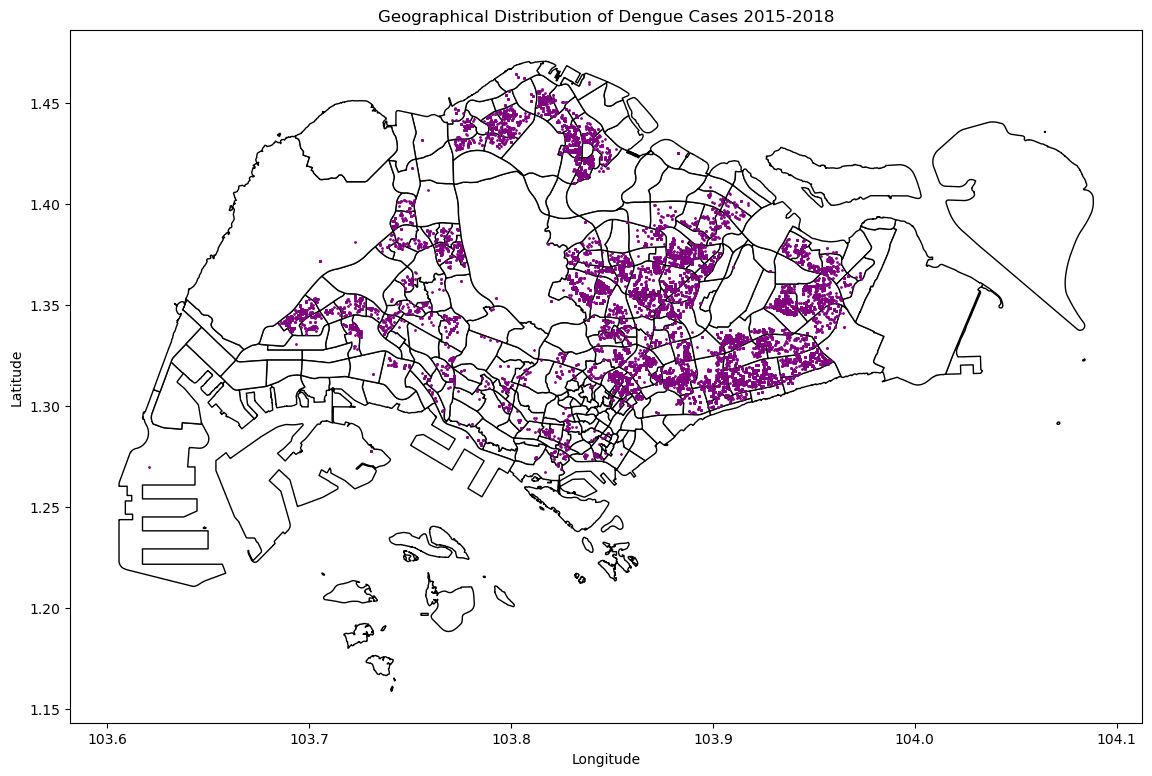

In [29]:
sg.plot(figsize=(16,9),color='white', edgecolor='black')
plt.scatter(x='Longitude',y='Latitude',data=all_clusters, s=1, color='purple')

plt.title('Geographical Distribution of Dengue Cases 2015-2018')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

*Interpretation: The geographical distribution of infecting locations and subzones from 2015 to 2018.* 

In [30]:
#Read all_clusters shapefile which is converted from csv file
clusters = gpd.read_file("../dataset/all_clusters/all_clusters-point.shp")

In [31]:
clusters.head()

,Number Of,Street Add,Latitude,Longitude,Cluster Nu,Recent Cas,Total Case,Date,Month Numb,geometry
0,1,admiralty drive (block 357a),1.450093,103.817001,1,2,42,160704,7,POINT (103.81700 1.45009)
1,1,admiralty drive (block 359),1.449739,103.815939,1,2,42,160704,7,POINT (103.81594 1.44974)
2,1,admiralty drive (block 360c),1.448494,103.814512,1,2,42,160704,7,POINT (103.81451 1.44849)
3,1,admiralty drive (block 467),1.452453,103.814628,1,2,42,160704,7,POINT (103.81463 1.45245)
4,4,admiralty drive (block 467a),1.452823,103.813730,1,2,42,160704,7,POINT (103.81373 1.45282)


In [32]:
clusters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20258 entries, 0 to 20257
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Number Of   20258 non-null  object  
 1   Street Add  20258 non-null  object  
 2   Latitude    20258 non-null  float64 
 3   Longitude   20258 non-null  float64 
 4   Cluster Nu  20258 non-null  object  
 5   Recent Cas  20258 non-null  object  
 6   Total Case  20258 non-null  object  
 7   Date        20258 non-null  object  
 8   Month Numb  20258 non-null  object  
 9   geometry    20258 non-null  geometry
dtypes: float64(2), geometry(1), object(7)
memory usage: 1.5+ MB


In [33]:
#Rename the columns
clusters.rename(columns={'Number Of':'Number Of Cases','Street Add':'Street Address',
                         'Cluster Nu':'Cluster Number','Recent Cas':'Recent Cases In Cluster',
                        'Total Case':'Total Cases In Cluster','Month Numb':'Month Number'},inplace=True)

In [34]:
#Change the datatype to int
clusters['Number Of Cases']=clusters['Number Of Cases'].map(lambda x: int(x))
clusters['Cluster Number']=clusters['Cluster Number'].map(lambda x: int(x))
clusters['Recent Cases In Cluster']=clusters['Recent Cases In Cluster'].map(lambda x: int(x))
clusters['Total Cases In Cluster']=clusters['Total Cases In Cluster'].map(lambda x: int(x))
clusters['Month Number']=clusters['Month Number'].map(lambda x: int(x))

In [35]:
clusters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20258 entries, 0 to 20257
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number Of Cases          20258 non-null  int64   
 1   Street Address           20258 non-null  object  
 2   Latitude                 20258 non-null  float64 
 3   Longitude                20258 non-null  float64 
 4   Cluster Number           20258 non-null  int64   
 5   Recent Cases In Cluster  20258 non-null  int64   
 6   Total Cases In Cluster   20258 non-null  int64   
 7   Date                     20258 non-null  object  
 8   Month Number             20258 non-null  int64   
 9   geometry                 20258 non-null  geometry
dtypes: float64(2), geometry(1), int64(5), object(2)
memory usage: 1.5+ MB


In [36]:
#Join the clusters data with subzones data
joined = clusters.sjoin(sg, how="right")

In [37]:
joined.columns

Index(['index_left', 'Number Of Cases', 'Street Address', 'Latitude',
       'Longitude', 'Cluster Number', 'Recent Cases In Cluster',
       'Total Cases In Cluster', 'Date', 'Month Number', 'OBJECTID',
       'SUBZONE_NO', 'SUBZONE_N', 'SUBZONE_C', 'CA_IND', 'PLN_AREA_N',
       'PLN_AREA_C', 'REGION_N', 'REGION_C', 'INC_CRC', 'FMEL_UPD_D', 'X_ADDR',
       'Y_ADDR', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [38]:
joined.drop(['index_left','Street Address','Latitude',
       'Longitude','Total Cases In Cluster','Month Number','SUBZONE_NO','SUBZONE_C', 'CA_IND','PLN_AREA_C','REGION_C', 'INC_CRC',
       'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng', 'SHAPE_Area'],axis=1,inplace=True)

In [39]:
joined.head()

,Number Of Cases,Cluster Number,Recent Cases In Cluster,Date,OBJECTID,SUBZONE_N,PLN_AREA_N,REGION_N,geometry
0,2.0,50.0,2.0,160503,1,PEOPLE'S PARK,OUTRAM,CENTRAL REGION,"POLYGON ((103.84319 1.28433, 103.84335 1.28420..."
1,2.0,49.0,2.0,151109,2,BUKIT MERAH,BUKIT MERAH,CENTRAL REGION,"POLYGON ((103.82209 1.28049, 103.82210 1.28011..."
2,1.0,5.0,2.0,170116,3,CHINATOWN,OUTRAM,CENTRAL REGION,"POLYGON ((103.84375 1.28508, 103.84400 1.28491..."
2,1.0,5.0,2.0,170116,3,CHINATOWN,OUTRAM,CENTRAL REGION,"POLYGON ((103.84375 1.28508, 103.84400 1.28491..."
2,2.0,5.0,2.0,170116,3,CHINATOWN,OUTRAM,CENTRAL REGION,"POLYGON ((103.84375 1.28508, 103.84400 1.28491..."


In [40]:
#Check the null values
joined.isnull().sum()

Number Of Cases            109
Cluster Number             109
Recent Cases In Cluster    109
Date                       109
OBJECTID                     0
SUBZONE_N                    0
PLN_AREA_N                   0
REGION_N                     0
geometry                     0
dtype: int64

In [41]:
#Check the null values %
joined['Number Of Cases'].isnull().sum()/len(joined)*100

0.5351794569646978

In [42]:
#Drop the rows with null values as they are less than 1% of the overall data
joined_wo_na = joined.dropna(axis=0)

In [43]:
joined_wo_na.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20258 entries, 0 to 322
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number Of Cases          20258 non-null  float64 
 1   Cluster Number           20258 non-null  float64 
 2   Recent Cases In Cluster  20258 non-null  float64 
 3   Date                     20258 non-null  object  
 4   OBJECTID                 20258 non-null  int64   
 5   SUBZONE_N                20258 non-null  object  
 6   PLN_AREA_N               20258 non-null  object  
 7   REGION_N                 20258 non-null  object  
 8   geometry                 20258 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(4)
memory usage: 1.5+ MB


In [44]:
#Output the joined clusters with subzones as a csv file for modeling
joined_wo_na.to_csv('../dataset/clusters_with_subzones.csv', index=False)

### Data Dictionary

The final data of dengue clusters with subzones has 9 columns (8 features + 1 target variable) which contains 20258 records from 2015 to 2018.

|Feature|Type|Description|
|---|---|---|
|Number Of Cases|int|Number of reported dengue cases at this location. This is the target variable that we are trying to predict.| 
|Cluster Number|int|Serial number of dengue cluster. The serial number cannot be used as an unique identifier because (1) the serial number is reused in other snapshots and (2) the serial number will change throughout the cluster's lifetime.|
|Recent Cases In Cluster|int|Number of dengue cases with onset in the last 2 weeks. This is an important feature for prediction.|
|Date|string|Date of the record in YYMMDD format|
|OBJECTID|int|Unique identifier of Singapore subzones planned by Urban Redevelopment Authority (URA)|
|SUBZONE_N|string|Name of subzone|
|PLN_AREA_N|string|Name of planned area|
|REGION_N|string|Name of region|
|geometry|geometry|Polygon data of subzone|

In [45]:
#Aggregate the dengue cases by subzones
clusters_sum = joined.groupby(by='OBJECTID')['Number Of Cases'].sum()

In [46]:
#Merge the clusters_sum data with subzones data
merged_data = sg.merge(clusters_sum, on='OBJECTID')

In [47]:
merged_data.columns

Index(['OBJECTID', 'SUBZONE_NO', 'SUBZONE_N', 'SUBZONE_C', 'CA_IND',
       'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N', 'REGION_C', 'INC_CRC',
       'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'Number Of Cases'],
      dtype='object')

In [48]:
#Print out the top 15 infecting subzones
merged_data.sort_values(by='Number Of Cases',ascending=False)[['SUBZONE_N','PLN_AREA_N','REGION_N','Number Of Cases']].head(15)

,SUBZONE_N,PLN_AREA_N,REGION_N,Number Of Cases
120,FRANKEL,BEDOK,EAST REGION,3462.0
166,TAMPINES WEST,TAMPINES,EAST REGION,3264.0
140,BEDOK SOUTH,BEDOK,EAST REGION,2019.0
205,SERANGOON GARDEN,SERANGOON,NORTH-EAST REGION,2017.0
116,ALJUNIED,GEYLANG,CENTRAL REGION,1982.0
309,YISHUN SOUTH,YISHUN,NORTH REGION,1652.0
273,YISHUN WEST,YISHUN,NORTH REGION,1534.0
141,TAMPINES EAST,TAMPINES,EAST REGION,1287.0
193,MARYMOUNT,BISHAN,CENTRAL REGION,1262.0
142,KAKI BUKIT,BEDOK,EAST REGION,961.0


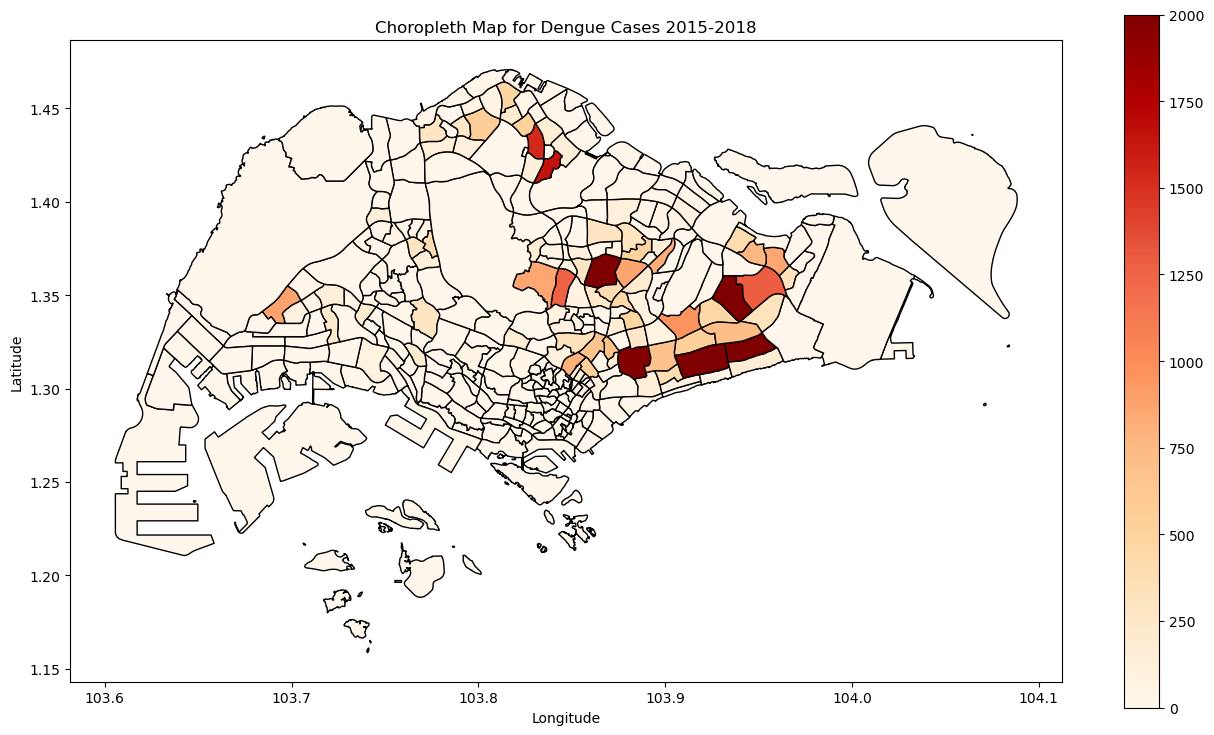

In [49]:
fig, ax = plt.subplots(figsize=(16, 9))
merged_data.plot(column='Number Of Cases', cmap='OrRd', ax=ax, legend=True,
                 vmin=0,vmax=2000,edgecolor='black')
ax.set_title('Choropleth Map for Dengue Cases 2015-2018')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

*Interpretation: Spatial distribution of the infecting locations in subzones of Singapore from 2015 to 2018. All infecting locations involved in the dengue clusters during this period are recorded and mapped to the corresponding subzones. The map is color-coded with the cumulative case numbers. The top 10 infecting subzones were mostly concentrated at the east, north-east, north and central regions.* 

## Mapping dengue cases with weather

In [50]:
#Read all_stations_weather shapefile which is converted from csv file
all_stations_weather = gpd.read_file("../dataset/all_stations_weather_daily_formatted/all_stations_weather_daily_formatted-point.shp")

In [51]:
all_stations_weather.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15354 entries, 0 to 15353
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Station     15354 non-null  object  
 1   Year        15354 non-null  object  
 2   week        15354 non-null  object  
 3   Weekly Rai  15354 non-null  object  
 4   Weekly Mea  4957 non-null   object  
 5   Weekly Max  5290 non-null   object  
 6   Weekly Min  5290 non-null   object  
 7   Weekly M_1  5392 non-null   object  
 8   Weekly M_2  5368 non-null   object  
 9   lat         15354 non-null  float64 
 10  long        15354 non-null  float64 
 11  geometry    15354 non-null  geometry
dtypes: float64(2), geometry(1), object(9)
memory usage: 1.4+ MB


In [52]:
#Rename the columns
all_stations_weather.rename(columns={'Weekly Rai':'Weekly Rain','Weekly Mea':'Mean Temp','Weekly Max':'Max Temp',
                                     'Weekly Min':'Min Temp','Weekly M_1':'Mean Wind Speed','Weekly M_2':'Max Wind Speed'},inplace=True)

In [53]:
#Change the datatype to float
all_stations_weather['Weekly Rain']=all_stations_weather['Weekly Rain'].map(lambda x: float(x))
all_stations_weather['Mean Temp']=all_stations_weather['Mean Temp'].map(lambda x: x if x == None else float(x))
all_stations_weather['Mean Wind Speed']=all_stations_weather['Mean Wind Speed'].map(lambda x: x if x == None else float(x))

In [54]:
#Filter the data
weather = all_stations_weather[(all_stations_weather['lat'] != 0)&(all_stations_weather['Year'] != '2014')]

In [55]:
#Check how many stations in weather data 
len(weather['Station'].unique())

39

In [56]:
#Aggregate the weekly rainfall by stations
weather_rain_mean = weather.groupby(by='Station')[['Weekly Rain','lat','long']].mean()

In [57]:
#Check the null value of weekly rain
weather_rain_mean.isnull().sum()

Weekly Rain    0
lat            0
long           0
dtype: int64

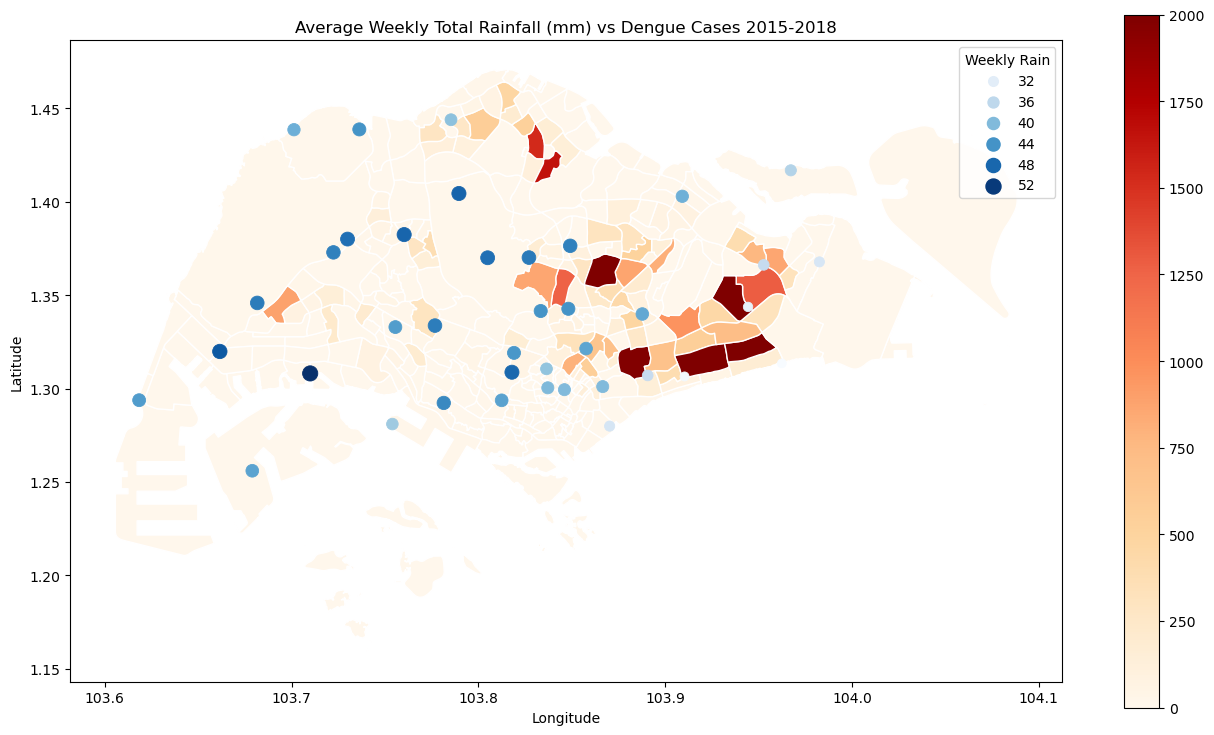

In [58]:
fig, ax = plt.subplots(figsize=(16, 9))
merged_data.plot(column='Number Of Cases', cmap='OrRd', ax=ax, legend=True,
                 vmin=0,vmax=2000,edgecolor='white')
sns.scatterplot(x='long',y='lat',data=weather_rain_mean,hue='Weekly Rain',
                size='Weekly Rain',sizes=(40, 120),edgecolor=None,palette='Blues')
ax.set_title('Average Weekly Total Rainfall (mm) vs Dengue Cases 2015-2018')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

*Interpretation: Spatial distribution of the infecting locations in subzones of Singapore alongside average weekly total rainfall measured from 39 stations between 2015 and 2018. While rainfall data was unavailable for all 323 subzones, it was observed that rainfall was more concentrated in the west and middle of Singapore, which is opposite to the distribution of dengue cases. Therefore, it is challenging to establish a clear relationship between rainfall and dengue cases in each subzone.* 

In [59]:
#Aggregate the weekly mean temp by stations
weather_temp_mean = weather.groupby(by='Station')[['Mean Temp','lat','long']].mean()

In [60]:
#Check the null value of mean temp
weather_temp_mean.isnull().sum()

Mean Temp    25
lat           0
long          0
dtype: int64

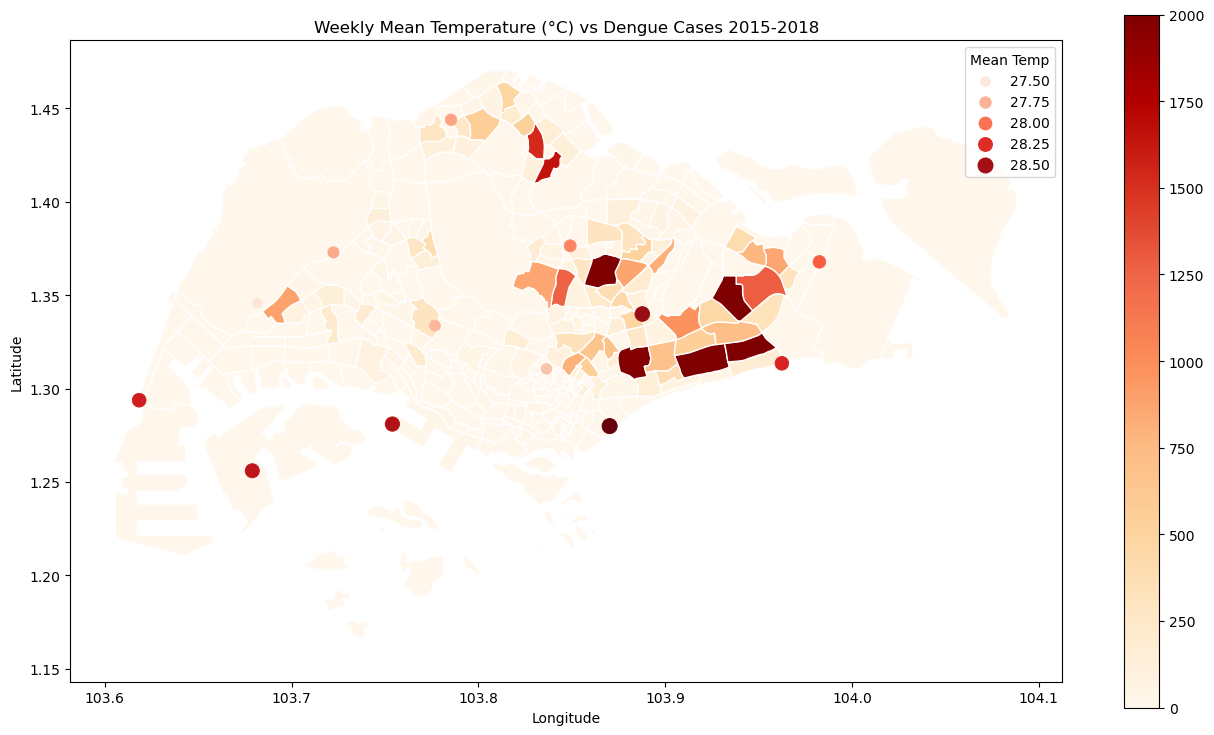

In [61]:
fig, ax = plt.subplots(figsize=(16, 9))
merged_data.plot(column='Number Of Cases', cmap='OrRd', ax=ax, legend=True,
                 vmin=0,vmax=2000,edgecolor='white')
sns.scatterplot(x='long',y='lat',data=weather_temp_mean,hue='Mean Temp',
                size='Mean Temp',sizes=(40, 120),edgecolor=None,palette='Reds')
ax.set_title('Weekly Mean Temperature (°C) vs Dengue Cases 2015-2018')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

*Interpretation: Spatial distribution of the infecting locations in subzones of Singapore alongside weekly mean temperature measured from 14 stations between 2015 and 2018. However, the data of weekly mean temperature was even more limited than rainfall data. It was observed that the south of Singapore had relatively higher temperatures, but this was not correlated with the distribution of dengue cases. Therefore, establishing a clear relationship between weekly mean temperature and dengue cases in each subzone is challenging.* 

In [62]:
#Aggregate the weekly mean wind speed by stations
weather_windspeed_mean = weather.groupby(by='Station')[['Mean Wind Speed','lat','long']].mean()

In [63]:
#Check the null value of mean wind speed
weather_windspeed_mean.isnull().sum()

Mean Wind Speed    25
lat                 0
long                0
dtype: int64

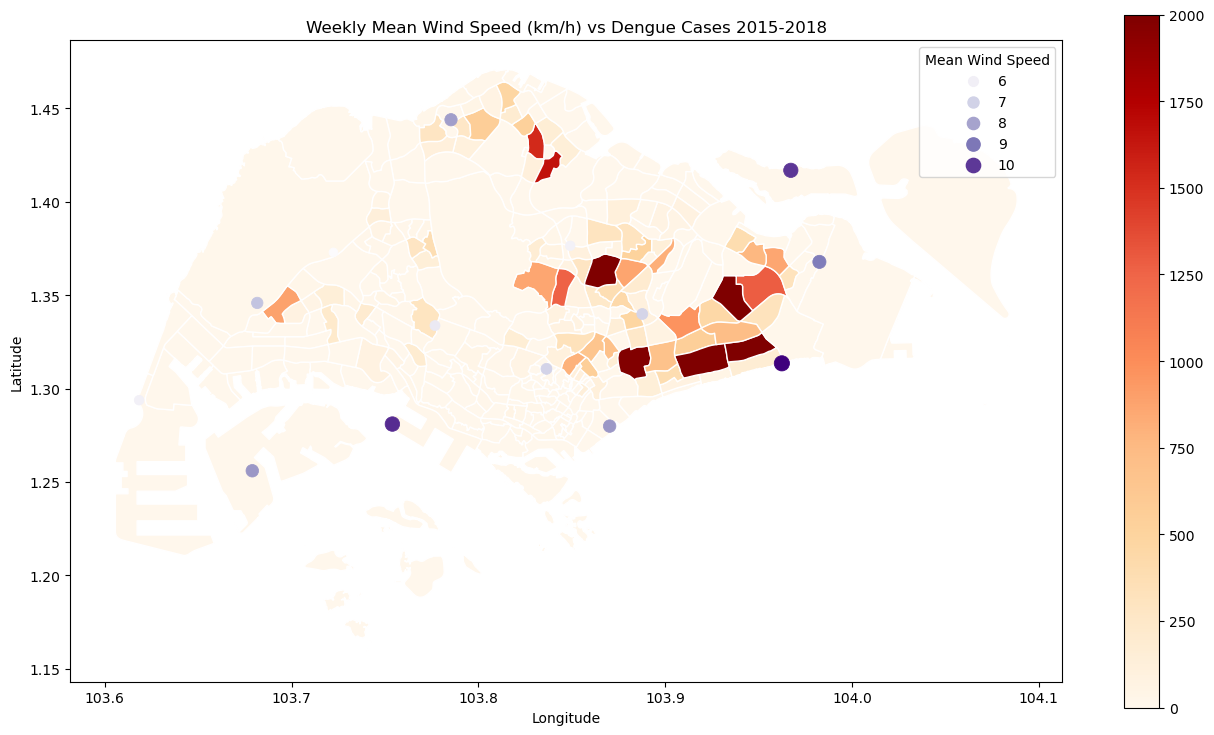

In [64]:
fig, ax = plt.subplots(figsize=(16, 9))
merged_data.plot(column='Number Of Cases', cmap='OrRd', ax=ax, legend=True,
                 vmin=0,vmax=2000,edgecolor='white')
sns.scatterplot(x='long',y='lat',data=weather_windspeed_mean,hue='Mean Wind Speed',
                size='Mean Wind Speed',sizes=(40, 120),edgecolor=None,palette='Purples')
ax.set_title('Weekly Mean Wind Speed (km/h) vs Dengue Cases 2015-2018')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

*Interpretation: Spatial distribution of the infecting locations in subzones of Singapore alongside weekly mean wind speed measured from 14 stations between 2015 and 2018. However, the data of weekly mean wind speed was similarly limited as the temperature data, and no correlation was found between wind speed and the distribution of dengue cases. Therefore, establishing a clear relationship between weekly mean wind speed and dengue cases in each subzone remains challenging.* 